In [99]:
import pandas as pd

train = pd.read_csv('~/Downloads/2025datathon/train.csv')
test = pd.read_csv('~/Downloads/2025datathon/test.csv')

- 목표: Deppession (이진 분류)
- 데이터 특징: 범주형 + 수치형 + 민감 응답 혼합

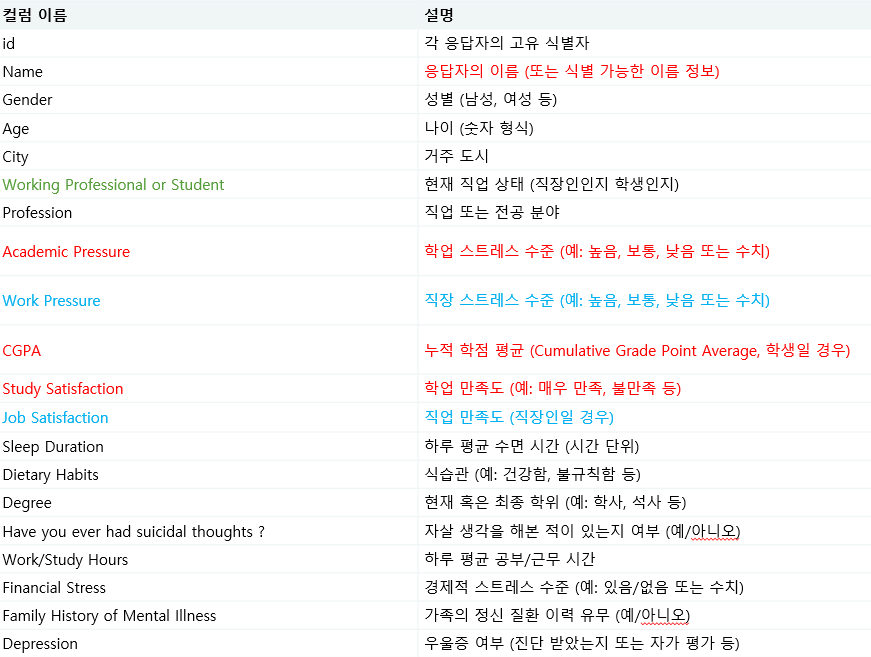

## 전처리

In [100]:
import pandas as pd
import numpy as np

train = pd.read_csv('~/Downloads/2025datathon/train.csv')
test = pd.read_csv('~/Downloads/2025datathon/test.csv')

### 0. 삭제

In [101]:
train.drop(columns=['id'], inplace=True)
train.drop(columns=['Name'], inplace=True)

### 1. Sleep Duration

- 기준을 만들어서 float 형으로 변환

In [102]:
train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [103]:
# 이상치, 알 수 없는 값들 제거
delete_values = [
    'Indore', 'Pune', 'Moderate', 'Unhealthy', 'Sleep_Duration',
    'Work_Study_Hours', 'No', '45', '49 hours', '55-66 hours', '40-45 hours', 
    '9-5 hours', '10-6 hours', '9-6 hours', '9-5', '45-48 hours', '35-36 hours'
]

train['Sleep Duration'] = train['Sleep Duration'].replace(delete_values, np.nan)
train['Sleep Duration_missing'] = train['Sleep Duration'].isnull().astype(int)
mode_val = train["Sleep Duration"].mode()[0]
train["Sleep Duration"] = train["Sleep Duration"].fillna(mode_val)

In [104]:
train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38807
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
1-6 hours                4
6-8 hours                4
8-9 hours                2
9-11 hours               2
10-11 hours              2
1-3 hours                1
1-2 hours                1
8 hours                  1
than 5 hours             1
3-6 hours                1
Name: count, dtype: int64

In [105]:
train

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_missing
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,0
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,0
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,0
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,0
140696,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,0
140697,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,0
140698,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,0


In [106]:
import numpy as np
import re

def convert_sleep_to_hours(val):
    try:
        val = str(val).strip().lower()

        # 특별 처리: 'than n hours' → 'less than n hours' 간주
        if 'than' in val and 'less' not in val and 'more' not in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) - 0.5

        # Less than n hours → n - 0.5
        if 'less than' in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) - 0.5

        # More than n hours → n + 0.5
        elif 'more than' in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) + 0.5

        # 정확히 n hours → 숫자만 추출
        elif re.match(r'^\d+\s*hours$', val):
            return float(re.findall(r'\d+', val)[0])

        # n-m hours 또는 n–n → 평균값
        elif re.search(r'\d+\s*[-–~]\s*\d+', val):
            nums = [int(n) for n in re.findall(r'\d+', val)]
            if len(nums) == 2:
                return sum(nums) / 2

        # 숫자만 → 그대로
        elif re.match(r'^\d+(\.\d+)?$', val):
            return float(val)

        # 나머지는 이상값으로 간주
        else:
            return np.nan

    except:
        return np.nan


In [107]:
train['Sleep Duration'] = train['Sleep Duration'].apply(convert_sleep_to_hours)

In [108]:
train['Sleep Duration'].value_counts()

Sleep Duration
4.5     38816
7.5     36969
8.5     32728
5.5     32142
3.5        16
6.5         8
5.0         5
2.5         5
7.0         4
10.5        2
10.0        2
1.5         1
2.0         1
8.0         1
Name: count, dtype: int64

In [109]:
print(train['Sleep Duration'].dtype)

float64


## 2. 결측치 처리

#### 2-1. 결측률 80%

- 파생 변수 만들어서(결측 여부) 의미 있는 누락 정보 보존 + 과적합 방지 할 것인지
- 아니면 값을 대체할지 

일단 파생 변수를 만들어 보겠음. 

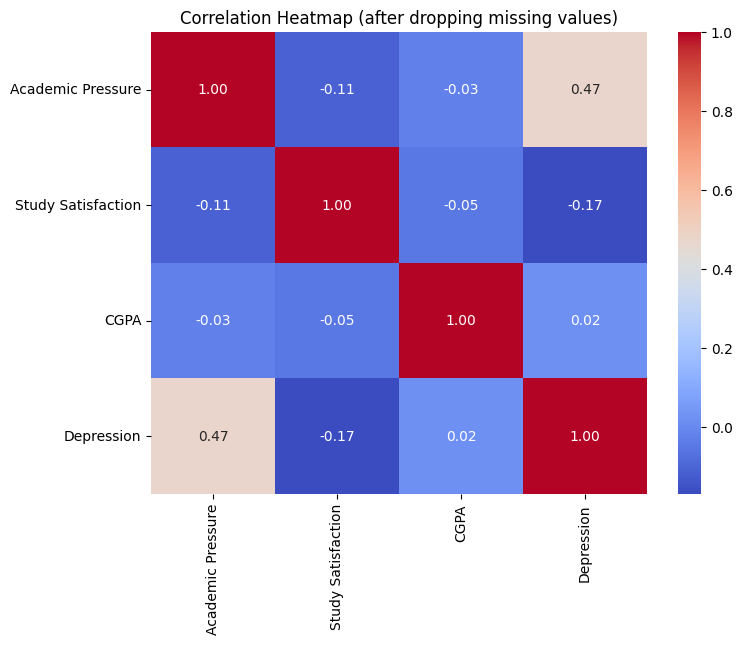

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 필요한 컬럼만 선택하고 결측치 제거
cols = ['Academic Pressure', 'Study Satisfaction', 'CGPA', 'Depression']
subset = train[cols].dropna()

# 상관관계 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (after dropping missing values)")
plt.show()

In [111]:
# 1. CGPA 컬럼 제거
train.drop(columns=['CGPA'], inplace=True)

In [112]:
# 2. Academic Pressure 결측 여부 파생 변수
train['Academic_Pressure_missing'] = train['Academic Pressure'].isnull().astype(int)

# 3. Study Satisfaction 결측 여부 파생 변수
train['Study_Satisfaction_missing'] = train['Study Satisfaction'].isnull().astype(int)

In [113]:
# # # 2. Work Pressure 결측치 채우기
# train.loc[(train['Working Professional or Student'] == 'Student') & (train['Work Pressure'].isna()),'Work_Pressure'] = -1

In [114]:
train['Academic_Pressure_missing']

0         1
1         1
2         0
3         1
4         1
         ..
140695    1
140696    1
140697    1
140698    1
140699    0
Name: Academic_Pressure_missing, Length: 140700, dtype: int64

*결과 예시*

| Academic Pressure | Academic\_Pressure\_missing | Study Satisfaction | Study\_Satisfaction\_missing |
| ----------------- | --------------------------- | ------------------ | ---------------------------- |
| 3.0               | 0                           | 4.0                | 0                            |
| NaN               | 1                           | NaN                | 1                            |
| 2.0               | 0                           | NaN                | 1                            |


- 원래 컬럼의 nan은 어떻게 처리?

    - 파생 변수를 만들었기 때문에, 그대로 두어도 됨.
    - 결측 여부 정보를 이미 담고 있어서
    - 하지만 사용하는 모델에 따라 nan을 허용하지 않으면 대체해야 함

1. 평균값 대체
- 가능은 하지만 무분별한 평균 대체는 정보 손실 및 왜곡을 유발할 수 있음.
- 특히 결측 자체가 의미를 갖는 경우(예: 설문 무응답 → 스트레스 회피?)엔 단순 평균은 부적절할 수 있음.
- 
```
train['Academic Pressure'].fillna(train['Academic Pressure'].median(), inplace=True)
train['Study Satisfaction'].fillna(train['Study Satisfaction'].median(), inplace=True)
```

2. imputer로 값 채우기
- 권장되는 방식!

- 파생 변수 없이 평균값 대체만 하면
    - 결측값이 있었다는 정보를 완전히 잃어버림
    - 실제로 결측이 의미를 가지는 경우 오히려 성능 저하


In [115]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 또는 'median', 'most_frequent'
train['Academic Pressure'] = imputer.fit_transform(train[['Academic Pressure']])
train['Study Satisfaction'] = imputer.fit_transform(train[['Study Satisfaction']])

#### 2-2. 나머지 결측치 처리

In [116]:
# train = train[train['Financial Stress'].notnull()].copy()

In [117]:
train['Financial Stress'].value_counts()

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

In [118]:
train['Financial Stress'] = train['Financial Stress'].fillna(2.0)

In [119]:
train['Work_Pressure_missing'] = train['Work Pressure'].isnull().astype(int)
train['Job_Satisfaction_missing'] = train['Job Satisfaction'].isnull().astype(int)

In [120]:
train['Work Pressure'] = imputer.fit_transform(train[['Work Pressure']])
train['Job Satisfaction'] = imputer.fit_transform(train[['Job Satisfaction']])

In [121]:
print(train.isnull().sum().sort_values(ascending=False).head())

Profession                               36630
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work_Pressure_missing                        0
dtype: int64


#### 2-3. 범주형 결측치 처리

In [122]:
train['Profession'].fillna('Missing', inplace=True)

/var/folders/vp/r4ltbhf53594yjfl0f86yqv80000gp/T/ipykernel_88445/4215184188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Profession'].fillna('Missing', inplace=True)


In [123]:
print(train.isnull().sum().sort_values(ascending=False).head())

Dietary Habits                           4
Degree                                   2
Have you ever had suicidal thoughts ?    0
Work_Pressure_missing                    0
Study_Satisfaction_missing               0
dtype: int64


### 3. 수치형 컬럼 스케일링

In [124]:
train.describe()

,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Depression,Sleep Duration_missing,Academic_Pressure_missing,Study_Satisfaction_missing,Work_Pressure_missing,Job_Satisfaction_missing
count,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000
mean,40.388621,3.142273,2.998998,2.944940,2.974404,6.447296,6.252679,2.988955,0.181713,0.000163,0.801727,0.801727,0.198422,0.198365
std,12.384099,0.614679,1.258598,0.605658,1.267871,1.588961,3.853615,1.413623,0.385609,0.012784,0.398700,0.398700,0.398813,0.398770
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,3.142273,2.000000,2.944940,2.000000,4.500000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,42.000000,3.142273,2.998998,2.944940,2.974404,5.500000,6.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,51.000000,3.142273,4.000000,2.944940,4.000000,7.500000,10.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,60.000000,5.000000,5.000000,5.000000,5.000000,10.500000,12.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


| 컬럼명                | 범위           | 평균 ± 표준편차           | 이유                               |
| ------------------ | ------------ | ----------------- | -------------------------------- |
| `Age`              | 18 \~ 60     | 평균40.4, std 12.4 | 넓은 범위. 다른 변수와 범위 차 큼             |
| `Work/Study Hours` | 0 \~ 12      | 평균 6.25, std 3.85 | 0부터 시작, 12까지 존재 → 거리 기반 모델에 영향 큼 |
| `Financial Stress` | 1 \~ 5       | 평균 2.99           | 다른 스트레스 계열들과 통일된 스케일 유리          |

- 범위가 넓은 수치형 변수
    - 표준화를 적용하기

In [125]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['Age', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

scaler = StandardScaler()
train[scale_cols] = scaler.fit_transform(train[scale_cols])


In [126]:
train[scale_cols].describe()

,Age,Sleep Duration,Work/Study Hours,Financial Stress
count,1.407000e+05,1.407000e+05,1.407000e+05,1.407000e+05
mean,-6.219143e-17,-3.181535e-17,-7.862936e-17,1.383715e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.807859e+00,-3.113552e+00,-1.622555e+00,-1.406997e+00
25%,-9.196197e-01,-1.225519e+00,-8.440624e-01,-6.995918e-01
50%,1.301172e-01,-5.961751e-01,-6.556970e-02,7.813129e-03
75%,8.568581e-01,6.625135e-01,9.724205e-01,7.152181e-01
max,1.583599e+00,2.550546e+00,1.491416e+00,1.422623e+00


### 4. 이진 범주형 -> 숫자 변환 (Yes/No → 1/0)

In [127]:
binary_cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_cols:
    train[col] = train[col].map({'Yes': 1, 'No': 0})

### (5). 범주형 확인

- 원핫인코딩 전, 고차원을 방지하기 위해 이상치 처리했습니다.

#### (5)-1. City

문제점
- 도시명 외에 사람 이름 등 잘못된 값이 포함 (Shrey, Vaanya, Ivaan, Gaurav 등)
- 고유값 98개 → 원핫 인코딩 시 고차원 문제 발생

해결 방법
- 상위 K개 도시 유지 + 나머지 Other로 묶기

In [128]:
# 상위 15개 도시만 유지
top_cities = train['City'].value_counts().nlargest(15).index
train['City'] = train['City'].where(train['City'].isin(top_cities), other='Other')

In [129]:
train['City'].value_counts()

City
Other            60539
Kalyan            6591
Patna             5924
Vasai-Virar       5765
Kolkata           5689
Ahmedabad         5613
Meerut            5528
Ludhiana          5226
Pune              5210
Rajkot            5207
Visakhapatnam     5176
Srinagar          5074
Mumbai            4966
Indore            4872
Agra              4684
Surat             4636
Name: count, dtype: int64

#### (5)-2. Degree 

문제점
- 고유값 115개 → 너무 많음
- 실제 학위 외에 오타, 숫자, 이름 등이 섞여 있음 (29, Vivaan, Advait, Bhavesh, BCA, M.Tech, 등등)

해결 방법
- 빈도 기준 상위 N개만 남기고 나머지는 'Other' 처리

In [130]:
train['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [131]:
degree_group_map = {
    # 의학/보건
    'MD': 'Medical',
    'MBBS': 'Medical',
    'B.Pharm': 'Pharmacy',
    'M.Pharm': 'Pharmacy',
    'MPharm': 'Pharmacy',
    'P.Pharm': 'Pharmacy',
    'S.Pharm': 'Pharmacy',
    'N.Pharm': 'Pharmacy',

    # 공학/기술
    'B.Tech': 'Engineering',
    'M.Tech': 'Engineering',
    'ME': 'Engineering',
    'MTech': 'Engineering',
    'M_Tech': 'Engineering',
    'BE': 'Engineering',
    'BCA': 'Engineering',
    'MCA': 'Engineering',
    'E.Tech': 'Engineering',
    'S.Tech': 'Engineering',
    'LLTech': 'Engineering',
    'LLCom': 'Engineering',

    # 인문/사회/비즈니스
    'BBA': 'Business',
    'MBA': 'Business',
    'M. Business Analyst': 'Business',
    'B.Com': 'Commerce',
    'M.Com': 'Commerce',
    'P.Com': 'Commerce',
    'LLB': 'Law',
    'LLM': 'Law',
    'LLBA': 'Law',
    'LL.Com': 'Law',
    'LL B.Ed': 'Education',
    'B.Ed': 'Education',
    'M.Ed': 'Education',
    'L.Ed': 'Education',
    'K.Ed': 'Education',
    'LLEd': 'Education',
    'BEd': 'Education',

    # 과학
    'BSc': 'Science',
    'MSc': 'Science',
    'B.Sc': 'Science',

    # 기타, 건축, 호텔경영 등
    'BHM': 'Hospitality',
    'MHM': 'Hospitality',
    'B.Arch': 'Architecture',
    'M.Arch': 'Architecture',
    'BArch': 'Architecture',
    'B.B.Arch': 'Architecture',

    # 학위 및 학교 졸업
    'PhD': 'PhD',
    'Class 12': 'School',
    'Class 11': 'School',
}

train['degree_group'] =train['Degree'].apply(lambda x: degree_group_map.get(x, 'Other'))

train=train.drop('Degree',axis=1)

In [132]:
train['degree_group'].value_counts()

degree_group
Engineering     26615
Education       17367
School          14730
Commerce        11209
Pharmacy        10397
Science          9909
Law              8998
Business         8849
Architecture     8750
Hospitality      7591
Other            6717
Medical          6465
PhD              3103
Name: count, dtype: int64

#### (5)-3. Dietary Habits

Moderate, Unhealthy, Healthy는 명확한 카테고리

나머지는 이상값 / 오입력 / 다른 컬럼에서 잘못 섞인 값임

In [133]:
train['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [134]:
# 정상 값만 남기고 나머지는 NaN으로
valid_dietary = ['Moderate', 'Unhealthy', 'Healthy']
train['Dietary Habits'] = train['Dietary Habits'].where(train['Dietary Habits'].isin(valid_dietary))

# 결측값은 최빈값으로 대체
train['Dietary Habits'] = train['Dietary Habits'].fillna(train['Dietary Habits'].mode()[0])


In [135]:
train['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49732
Unhealthy    46227
Healthy      44741
Name: count, dtype: int64

In [136]:
from sklearn.preprocessing import LabelEncoder

# Gender, Working Status - Binary
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Working Professional or Student'] = train['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})

# Degree, Dietary Habits - One-hot encoding
train = pd.get_dummies(train, columns=['degree_group', 'Dietary Habits'], drop_first=True)

# Profession, City - Target encoding (또는 frequency encoding)
# 예: Target Mean Encoding (Depression 컬럼 사용)
profession_target_mean = train.groupby('Profession')['Depression'].mean()
train['Profession' + '_target'] = train['Profession'].map(profession_target_mean)
city_target_mean = train.groupby('City')['Depression'].mean()
train['City' + '_target'] = train['City'].map(city_target_mean)

# 이후 필요시 원본 컬럼 제거
train.drop(columns=['Profession', 'City'], inplace=True)

In [137]:
train

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,...,degree_group_Medical,degree_group_Other,degree_group_PhD,degree_group_Pharmacy,degree_group_School,degree_group_Science,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Profession_target,City_target
0,0,0.695360,1,3.142273,5.000000,2.94494,2.000000,1.291858,0,-1.363057,...,False,False,False,False,False,False,False,False,0.048567,0.192690
1,1,-1.161867,1,3.142273,4.000000,2.94494,3.000000,-1.225519,1,0.193928,...,False,False,False,False,False,False,False,True,0.055649,0.186194
2,1,-0.596624,0,5.000000,2.998998,2.00000,2.974404,-0.596175,1,-0.844062,...,False,False,False,True,False,False,False,False,0.534944,0.159196
3,1,-1.484863,1,3.142273,5.000000,2.94494,1.000000,-1.225519,1,0.972421,...,False,False,False,False,False,False,True,False,0.055649,0.131293
4,0,-0.838871,1,3.142273,1.000000,2.94494,1.000000,-0.596175,1,0.712923,...,False,False,False,False,False,False,False,True,0.056628,0.186194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,-1.807859,1,3.142273,5.000000,2.94494,4.000000,-0.596175,0,-1.103560,...,False,False,False,False,True,False,False,True,0.534944,0.217887
140696,0,0.049368,1,3.142273,5.000000,2.94494,4.000000,0.662513,1,-0.065570,...,False,False,False,False,False,False,True,False,0.018684,0.186194
140697,0,-1.323365,1,3.142273,3.000000,2.94494,1.000000,1.291858,0,-0.584565,...,False,False,False,False,False,False,True,False,0.050607,0.173668
140698,0,0.695360,1,3.142273,5.000000,2.94494,2.000000,-0.596175,1,0.972421,...,False,False,False,False,False,False,True,False,0.064073,0.211667


In [138]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    train_copy = train

    y_target = train_copy['Depression']
    X_features = train_copy.drop('Depression', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                        test_size=0.3, random_state=0, stratify=y_target)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(train)


In [139]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    train_copy = train

    y_target = train_copy['Depression']
    X_features = train_copy.drop('Depression', axis=1)

    X_train_val, X_test, y_train_val, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42, stratify=y_target)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

    return X_train, X_test, y_train, y_test, X_val, y_val

X_train, X_test, y_train, y_test, X_val, y_val = get_train_test_dataset(train)


In [ ]:

%pip install catboost optuna 

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
import optuna

# categorical columns, keep track of them:
cat_features = [] 

# params 
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 1000),
        "depth": trial.suggest_int("depth", 8, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.07, 0.22, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.2, 2.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.4, 0.9),
        "border_count": trial.suggest_int("border_count", 200, 255),
        "random_strength": trial.suggest_float("random_strength", 0.01, 0.4),
    }

    model = CatBoostClassifier(**params)

    model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, early_stopping_rounds=30, verbose=0)

    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)

    return accuracy

study = optuna.create_study(direction="maximize") 
study.optimize(objective, n_trials=50)

print("Best trial:")
print(study.best_trial)

print("Best params:")
print(study.best_params)

# Train final model
final_model = CatBoostClassifier(**study.best_params)
final_model.fit(X_train, y_train, cat_features=cat_features)

import joblib
joblib.dump(study, "catboost_optuna_study.pkl")

[I 2025-06-03 14:46:26,518] A new study created in memory with name: no-name-00fb5a75-a78d-4a00-a857-0583f87792d8


Note: you may need to restart the kernel to use updated packages.


[I 2025-06-03 14:46:29,706] Trial 0 finished with value: 0.9384150675195452 and parameters: {'iterations': 769, 'depth': 10, 'learning_rate': 0.08404929927510103, 'l2_leaf_reg': 0.49914557496958717, 'bagging_temperature': 0.65627058290826, 'border_count': 221, 'random_strength': 0.04792705829336842}. Best is trial 0 with value: 0.9384150675195452.
[I 2025-06-03 14:46:31,297] Trial 1 finished with value: 0.9383795309168443 and parameters: {'iterations': 741, 'depth': 8, 'learning_rate': 0.13443941065390336, 'l2_leaf_reg': 1.0661741694636673, 'bagging_temperature': 0.6233224511644163, 'border_count': 208, 'random_strength': 0.3225446481406777}. Best is trial 0 with value: 0.9384150675195452.
[I 2025-06-03 14:46:33,738] Trial 2 finished with value: 0.9385572139303483 and parameters: {'iterations': 735, 'depth': 8, 'learning_rate': 0.0944755079176732, 'l2_leaf_reg': 0.2532321726948528, 'bagging_temperature': 0.8047938973231386, 'border_count': 234, 'random_strength': 0.03356449999573279}. 

Best trial:
FrozenTrial(number=34, state=1, values=[0.9396233120113717], datetime_start=datetime.datetime(2025, 6, 3, 14, 48, 10, 170507), datetime_complete=datetime.datetime(2025, 6, 3, 14, 48, 11, 353441), params={'iterations': 626, 'depth': 8, 'learning_rate': 0.18434234865711102, 'l2_leaf_reg': 0.6087258503740413, 'bagging_temperature': 0.6133479845494182, 'border_count': 240, 'random_strength': 0.3486539015187813}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=1000, log=False, low=500, step=1), 'depth': IntDistribution(high=10, log=False, low=8, step=1), 'learning_rate': FloatDistribution(high=0.22, log=True, low=0.07, step=None), 'l2_leaf_reg': FloatDistribution(high=2.0, log=True, low=0.2, step=None), 'bagging_temperature': FloatDistribution(high=0.9, log=False, low=0.4, step=None), 'border_count': IntDistribution(high=255, log=False, low=200, step=1), 'random_strength': FloatDistribution(high=0.4, log=False, low=0.01, 

['catboost_optuna_study.pkl']

In [146]:
# get the report of the model performance on accuracy and f1 and recall scores
y_pred = final_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print ("Recall Score:", f1_score(y_test, y_pred, average='macro'))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23027
           1       0.83      0.80      0.81      5113

    accuracy                           0.93     28140
   macro avg       0.89      0.88      0.89     28140
weighted avg       0.93      0.93      0.93     28140

Accuracy: 0.9328358208955224
F1 Score: 0.9323433979062895
Recall Score: 0.8854217732833217


                                  Feature  Importance
1                                     Age   14.529996
9                        Work/Study Hours    9.764405
8   Have you ever had suicidal thoughts ?    8.893080
4                           Work Pressure    8.735987
6                        Job Satisfaction    8.105243
10                       Financial Stress    8.090206
32                            City_target    6.773731
31                      Profession_target    6.646198
7                          Sleep Duration    5.294855
30               Dietary Habits_Unhealthy    3.296472


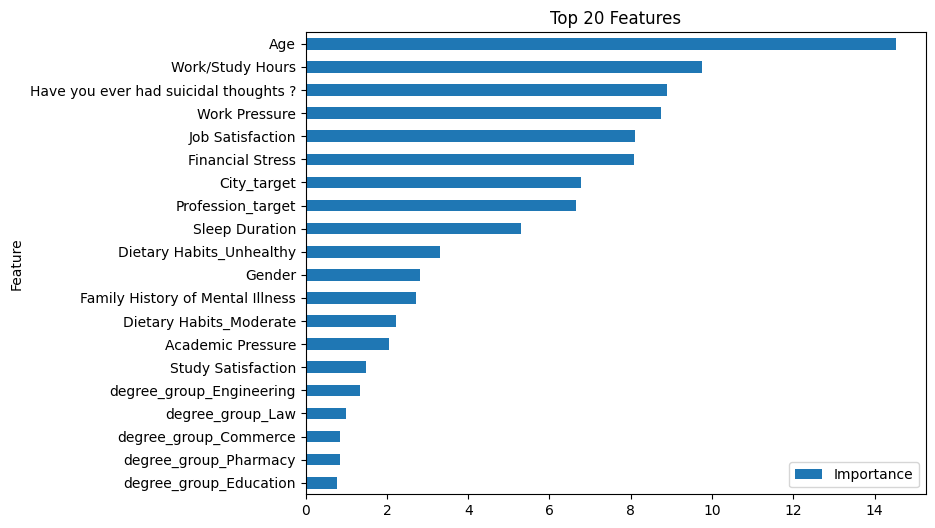

In [141]:
import matplotlib.pyplot as plt

importances = final_model.feature_importances_
feature_names = X_train.columns

# 중요도 DataFrame 생성
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 상위 N개 확인
print(importance_df.head(10))

# 시각화 (선택)
importance_df.head(20).plot(kind='barh', x='Feature', y='Importance', figsize=(8,6), title='Top 20 Features')
plt.gca().invert_yaxis()
plt.show()

In [142]:

test_df = pd.read_csv('~/Downloads/2025datathon/test.csv')

test = test_df.copy()

In [143]:
test.drop(columns=['id'], inplace=True)
test.drop(columns=['Name'], inplace=True)

# 1. CGPA 컬럼 제거
test.drop(columns=['CGPA'], inplace=True)

##### Sleep Duration ##### 
test['Sleep Duration'].value_counts()

# 이상치, 알 수 없는 값들 제거
delete_values = [
    'Indore', 'Pune', 'Moderate', 'Unhealthy', 'Sleep_Duration',
    'Work_Study_Hours', 'No', '45', '49 hours', '55-66 hours', '40-45 hours', 
    '9-5 hours', '10-6 hours', '9-6 hours', '9-5', '45-48 hours', '35-36 hours'
]

test['Sleep Duration'] = test['Sleep Duration'].replace(delete_values, np.nan)
test['Sleep Duration_missing'] = test['Sleep Duration'].isnull().astype(int)
mode_val = test["Sleep Duration"].mode()[0]
test["Sleep Duration"] = test["Sleep Duration"].fillna(mode_val)

import numpy as np
import re

def convert_sleep_to_hours(val):
    try:
        val = str(val).strip().lower()

        # 특별 처리: 'than n hours' → 'less than n hours' 간주
        if 'than' in val and 'less' not in val and 'more' not in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) - 0.5

        # Less than n hours → n - 0.5
        if 'less than' in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) - 0.5

        # More than n hours → n + 0.5
        elif 'more than' in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) + 0.5

        # 정확히 n hours → 숫자만 추출
        elif re.match(r'^\d+\s*hours$', val):
            return float(re.findall(r'\d+', val)[0])

        # n-m hours 또는 n–n → 평균값
        elif re.search(r'\d+\s*[-–~]\s*\d+', val):
            nums = [int(n) for n in re.findall(r'\d+', val)]
            if len(nums) == 2:
                return sum(nums) / 2

        # 숫자만 → 그대로
        elif re.match(r'^\d+(\.\d+)?$', val):
            return float(val)

        # 나머지는 이상값으로 간주
        else:
            return np.nan

    except:
        return np.nan
test['Sleep Duration'] = test['Sleep Duration'].apply(convert_sleep_to_hours)

##### Sleep Duration ##### 
from sklearn.impute import SimpleImputer


# 2. Academic Pressure 결측 여부 파생 변수
test['Academic_Pressure_missing'] = test['Academic Pressure'].isnull().astype(int)

# 3. Study Satisfaction 결측 여부 파생 변수
test['Study_Satisfaction_missing'] = test['Study Satisfaction'].isnull().astype(int)

imputer = SimpleImputer(strategy='mean')  # 또는 'median', 'most_frequent'
test['Academic Pressure'] = imputer.fit_transform(test[['Academic Pressure']])
test['Study Satisfaction'] = imputer.fit_transform(test[['Study Satisfaction']])

# 4. Financial Stress
test['Financial Stress'] = test['Financial Stress'].fillna(2.0)

# 5. Work_Pressure
test['Work_Pressure_missing'] = test['Work Pressure'].isnull().astype(int)

# 6. Job_Satisfaction
test['Job_Satisfaction_missing'] = test['Job Satisfaction'].isnull().astype(int)

test['Work Pressure'] = imputer.fit_transform(test[['Work Pressure']])
test['Job Satisfaction'] = imputer.fit_transform(test[['Job Satisfaction']])

# 7. Profession
test['Profession'].fillna('Missing', inplace=True)

from sklearn.preprocessing import StandardScaler

scale_cols = ['Age', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

scaler = StandardScaler()
test[scale_cols] = scaler.fit_transform(test[scale_cols])

# # 8. 
binary_cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_cols:
    test[col] = test[col].map({'Yes': 1, 'No': 0})

# # 9. City
# 상위 15개 도시만 유지
top_cities = test['City'].value_counts().nlargest(15).index
test['City'] = test['City'].where(test['City'].isin(top_cities), other='Other')


# # Degree
test['Degree'].value_counts()

degree_group_map = {
    # 의학/보건
    'MD': 'Medical',
    'MBBS': 'Medical',
    'B.Pharm': 'Pharmacy',
    'M.Pharm': 'Pharmacy',
    'MPharm': 'Pharmacy',
    'P.Pharm': 'Pharmacy',
    'S.Pharm': 'Pharmacy',
    'N.Pharm': 'Pharmacy',

    # 공학/기술
    'B.Tech': 'Engineering',
    'M.Tech': 'Engineering',
    'ME': 'Engineering',
    'MTech': 'Engineering',
    'M_Tech': 'Engineering',
    'BE': 'Engineering',
    'BCA': 'Engineering',
    'MCA': 'Engineering',
    'E.Tech': 'Engineering',
    'S.Tech': 'Engineering',
    'LLTech': 'Engineering',
    'LLCom': 'Engineering',

    # 인문/사회/비즈니스
    'BBA': 'Business',
    'MBA': 'Business',
    'M. Business Analyst': 'Business',
    'B.Com': 'Commerce',
    'M.Com': 'Commerce',
    'P.Com': 'Commerce',
    'LLB': 'Law',
    'LLM': 'Law',
    'LLBA': 'Law',
    'LL.Com': 'Law',
    'LL B.Ed': 'Education',
    'B.Ed': 'Education',
    'M.Ed': 'Education',
    'L.Ed': 'Education',
    'K.Ed': 'Education',
    'LLEd': 'Education',
    'BEd': 'Education',

    # 과학
    'BSc': 'Science',
    'MSc': 'Science',
    'B.Sc': 'Science',

    # 기타, 건축, 호텔경영 등
    'BHM': 'Hospitality',
    'MHM': 'Hospitality',
    'B.Arch': 'Architecture',
    'M.Arch': 'Architecture',
    'BArch': 'Architecture',
    'B.B.Arch': 'Architecture',

    # 학위 및 학교 졸업
    'PhD': 'PhD',
    'Class 12': 'School',
    'Class 11': 'School',
}

test['degree_group'] =test['Degree'].apply(lambda x: degree_group_map.get(x, 'Other'))

test=test.drop('Degree',axis=1)


# # Dietary Habits
# 정상 값만 남기고 나머지는 NaN으로
valid_dietary = ['Moderate', 'Unhealthy', 'Healthy']
test['Dietary Habits'] = test['Dietary Habits'].where(test['Dietary Habits'].isin(valid_dietary))

# 결측값은 최빈값으로 대체
test['Dietary Habits'] = test['Dietary Habits'].fillna(test['Dietary Habits'].mode()[0])

# Gender, Working Status - Binary
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Working Professional or Student'] = test['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})

# Degree, Dietary Habits - One-hot encoding
test = pd.get_dummies(test, columns=['degree_group', 'Dietary Habits'], drop_first=True)


test['Profession_target'] = test['Profession'].map(profession_target_mean)
test['City_target'] = test['City'].map(city_target_mean)

# 이후 필요시 원본 컬럼 제거
test.drop(columns=['Profession', 'City'], inplace=True)

/var/folders/vp/r4ltbhf53594yjfl0f86yqv80000gp/T/ipykernel_88445/1701379026.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Profession'].fillna('Missing', inplace=True)


In [144]:
pred_submit = final_model.predict(test)

In [145]:
# 1. 샘플 제출 파일 불러오기
submission = pd.read_csv('~/Downloads/2025datathon/sample_submission.csv')

# 3. 예측 결과를 Depression 컬럼에 저장
submission['Depression'] = pred_submit

print(f"제출 파일의 shape: {submission.shape}")

# 4. 제출 파일 저장
submission.to_csv('submission_1_final_cat.csv', index=False)


제출 파일의 shape: (93800, 2)
